# 'Netflix' dataset EDA

## Setup

In [1]:
import os

# Actual directory
os.getcwd()

'C:\\Users\\Ospite\\Desktop\\Portfolio-Projects-main\\Portfolio-Projects-main\\2. Netflix Movies'

In [2]:
# Files within the directory
os.listdir()

['.ipynb_checkpoints',
 '1. Download data from TMDB.ipynb',
 '2. Followers scraping.ipynb',
 '3. Build the DataFrame.ipynb',
 'data',
 'movie_pandas',
 'Netflix EDA.ipynb',
 'README.md']

In [3]:
# Change the directory (if necessary)
#os.chdir("/PATH/TO/NEW/DIRECTORY")

In [4]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Import the dataset
df = pd.read_excel('data/final_netflix_df_clean.xlsx')
df.sample(10)

,tmdb_id,imdb_id,title,original_title,release_date,year,month,year/month,weekday,original_language,...,director,male_actors,female_actors,total_actors,gender_difference,vote_count,vote_average,followers,imdb_score,score_rolling_average
438,743601,tt12987894,American Murder: The Family Next Door,American Murder: The Family Next Door,2020-09-30,2020,september,2020-09-01,wednesday,English,...,['Jenny Popplewell'],0,0,0,NaN,437,7.3,0,7.2,6.12
605,591274,tt9701940,Fear Street: 1978,Fear Street: 1978,2021-07-09,2021,july,2021-07-01,friday,English,...,['Leigh Janiak'],16,13,29,3.0,1007,7.3,812000,6.7,5.94
19,353571,tt1639084,Tallulah,Tallulah,2016-07-29,2016,july,2016-07-01,friday,English,...,['Siân Heder'],14,11,25,3.0,587,6.8,834165,6.7,6.33
637,726916,tt12299824,JJ+E,Vinterviken,2021-09-08,2021,september,2021-09-01,wednesday,Swedish,...,['Alexis Almström'],3,1,4,2.0,46,5.6,7013,5.3,6.10
154,518452,tt7170950,Like Father,Like Father,2018-08-03,2018,august,2018-08-01,friday,English,...,['Lauren Miller'],12,13,25,-1.0,527,6.3,8206,6.1,5.97
533,655830,tt11313944,Layla Majnun,Layla Majnun,2021-02-11,2021,february,2021-02-01,thursday,Indonesian,...,['Monty Tiwa'],4,4,8,0.0,2,7.5,0,6.4,6.07
345,567970,tt3111426,Lost Girls,Lost Girls,2020-03-13,2020,march,2020-03-01,friday,English,...,['Liz Garbus'],9,9,18,0.0,518,6.1,442680,6.1,6.35
201,565255,tt9316022,Struggle: The Life and Lost Art of Szukalski,Struggle: The Life and Lost Art of Szukalski,2018-12-21,2018,december,2018-12-01,friday,English,...,['Irek Dobrowolski'],3,0,3,3.0,52,7.7,7740,8.0,6.53
455,753230,tt13206564,The Three Deaths of Marisela Escobedo,Las tres muertes de Marisela Escobedo,2020-10-14,2020,october,2020-10-01,wednesday,Spanish,...,['Carlos Pérez Osorio'],0,0,0,NaN,175,9.0,0,8.2,6.73
653,776909,tt11698662,Sounds Like Love,Fuimos canciones,2021-09-29,2021,september,2021-09-01,wednesday,Spanish,...,['Juana Macías'],2,5,7,-3.0,62,6.6,393000,5.3,5.79


In [6]:
print('The number of original Netflix films is: ', df.shape[0])

The number of original Netflix films is:  684


In [7]:
len(df.columns)

27

## Business Questions

#### 1) What are the characteristics of the highest rated movies?
#### 2) At what time of the year, month or week are the movies released?
#### 3) Is Netflix releasing the highest rated movies at the times when people would watch them the most? 
#### 4) How does the popularity of the actors influence the criticism of the movies?
#### 5) Is the rating of films improving as the number of their own productions increases?
#### 6) Is netflix increasing their investing in new movies?
#### 7) Which genres have the best rating score?

## Univariate exploratory data analysis

### 1. Column "imdb_score": summarizing the rating score

In [8]:
df['imdb_score'].describe()

count    684.000000
mean       6.206579
std        0.997317
min        2.500000
25%        5.600000
50%        6.300000
75%        6.900000
max        9.000000
Name: imdb_score, dtype: float64

- The score mean is about 6.21 with a standard deviation of 1. 
- The median (50th percentile) matches aprox. with the mean, so we do not have extremely low or extremely high values respect to the mean. 
- The score values do not reach their limits: the maximum value is 9 and the minimum value is 2.5

Text(4.5, 140, 'Mean = 6.21')

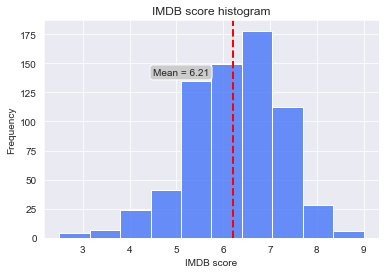

In [9]:
# Histogram
sns.set_style("darkgrid")
sns.set_palette("rainbow")
sns.histplot(x=df['imdb_score'], bins=10, data=df)
plt.title("IMDB score histogram")
plt.xlabel("IMDB score")
plt.ylabel("Frequency")
plt.axvline(df['imdb_score'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate((f"Mean = {round(df['imdb_score'].mean(), 2)}"), 
             xy =(4.5, 140),
             xytext =(4.5, 140),
             bbox = dict(boxstyle ="round", fc ="0.8"))

- The distribution seems normal with a smooth left skewness

Text(4.5, 0.8, 'Media = 6.21')

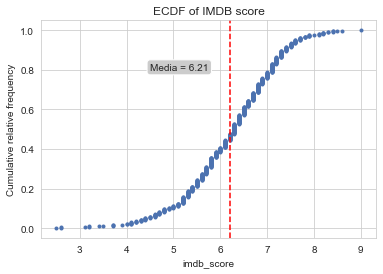

In [10]:
# ECDF: shows what is the probability of obtaining a value less than or equal to 'x'
def ecdf(data, column):
    """Calculates a ECDF for a one-dimensional array of measures."""
    # Total number of points: n
    n = len(data[column])

    # x-data for the ECDF: x
    x = np.sort(data[column])

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    sns.set_style("whitegrid")
    sns.set_palette("deep")
    plt.plot(x, y, marker='.', linestyle = 'none')
    plt.title(f"ECDF of {column}")
    plt.xlabel(f'{column}')
    plt.ylabel(f'Cumulative relative frequency')

ecdf(df, 'imdb_score')
plt.title("ECDF of IMDB score")
plt.axvline(df['imdb_score'].mean(), color='r', linestyle='dashed', linewidth=1.5)
plt.annotate((f"Media = {round(df['imdb_score'].mean(), 2)}"), 
             xy =(4.5, 0.8),
             xytext =(4.5, 0.8),
            bbox = dict(boxstyle ="round", fc ="0.8"))

- Just a 20% de films scored more than 7 
- Just a 10% of films scored more than 8
- Just a 15% of films scored less than 5
- Between 5.5 and 7 we have the 60% of califications

### 2. Column "score_rolling_average"

C:\Users\Ospite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Last 10 movies IMDB score average')

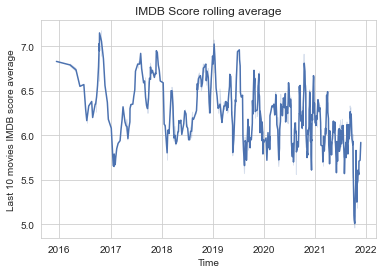

In [11]:
sns.lineplot("release_date", "score_rolling_average", data = df)
plt.title("IMDB Score rolling average")
plt.xlabel("Time")
plt.ylabel("Last 10 movies IMDB score average")

Besides the fluctuations there is a downward trend in ratings as Netflix releases new movies

### 3. Column "runtime"

In [12]:
df['runtime'].describe()

count    684.000000
mean      94.122807
std       26.818289
min        4.000000
25%       87.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: runtime, dtype: float64

- The mean is about 94 minutes with a standard deviation of 26.82 minutes
- The median mathces aprox. with the mean so we do not have have extremely low or extremely high values respect to the mean.
- The extreme values are 4 and 209 minutes

Text(20, 140, 'Media = 94.12')

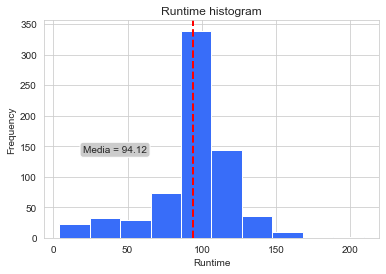

In [13]:
# Histogram
sns.set_style("whitegrid")
sns.set_palette("rainbow")
plt.hist(x=df['runtime'], bins=10)
plt.title("Runtime histogram")
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.axvline(df['runtime'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate((f"Media = {round(df['runtime'].mean(), 2)}"), 
             xy =(20, 140),
             xytext =(20, 140),
            bbox = dict(boxstyle ="round", fc ="0.8"))

- The distribution has a big ammount of values concentrated around the mean

Text(20, 0.8, 'Mean = 94.12')

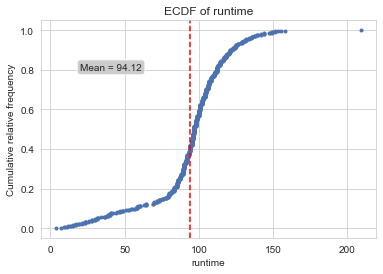

In [14]:
# ECDF
ecdf(df, 'runtime')
plt.axvline(df['runtime'].mean(), color='r', linestyle='dashed', linewidth=1.5)
plt.annotate((f"Mean = {round(df['runtime'].mean(), 2)}"), 
             xy =(20, 0.8),
             xytext =(20, 0.8),
            bbox = dict(boxstyle ="round", fc ="0.8"))

- Aprox. 60% of the cases are above the mean, so we have some cases extremely low (short films). 
- Aprox. a 20% of films last less than 1 hour (documentaries and short films).
- Aprox. a 20% of films last more than 2 hours.

### 4. Column "year"

In [15]:
df['year'].value_counts()

2020    182
2021    172
2019    125
2018     99
2017     66
2016     30
2015      9
2014      1
Name: year, dtype: int64

Text(0, 0.5, 'Frequency')

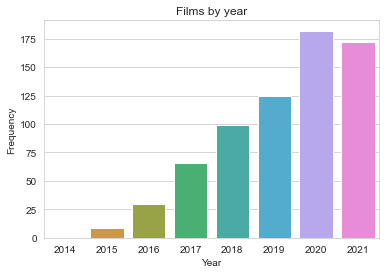

In [16]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.countplot(x='year',data=df)
plt.title('Films by year')
plt.xlabel("Year")
plt.ylabel("Frequency")

- The number of new films per year was growing steadily until 2021 when there is an stabilization

###### Rolling growth

In [17]:
films_by_year = df.groupby('year')['title'].count()
df_films_by_year = pd.DataFrame(films_by_year)
df_films_by_year.reset_index(inplace=True)
df_films_by_year['Rolling growth (%)'] = df_films_by_year['title']\
    .rolling(window=2).apply(lambda x: round(((x.iloc[1]-x.iloc[0])*100)/x.iloc[0],2))
df_films_by_year

,year,title,Rolling growth (%)
0,2014,1,NaN
1,2015,9,800.00
2,2016,30,233.33
3,2017,66,120.00
4,2018,99,50.00
5,2019,125,26.26
6,2020,182,45.60
7,2021,172,-5.49


- In relative terms, only in the 2020 Netflix incremented porcentually the production of new content. We see then a strong investment in own content.

### 5. Column "month"

In [18]:
df['month'].value_counts()

october      101
september     72
november      63
april         63
august        53
july          53
may           53
june          51
december      51
march         48
february      39
january       37
Name: month, dtype: int64

Text(0, 0.5, 'Frequency')

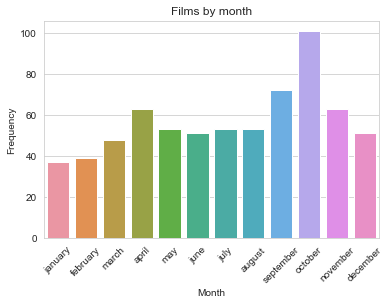

In [19]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.countplot(x='month', data=df, order=["january", 
                                         "february", 
                                         "march", 
                                         "april", 
                                         "may", 
                                         "june", 
                                         "july", 
                                         "august",
                                         "september", 
                                         "october", 
                                         "november", 
                                         "december"])
plt.xticks(rotation=45)
plt.title('Films by month')
plt.xlabel("Month")
plt.ylabel("Frequency")

- The largest number of premieres coincides with the autumn months of the global north. Hypothetically, it could be the result of users spending more time at home with less social activity
- The other peak occurs in spring (April more precisely)

### 6. Column "weekday"

In [20]:
df['weekday'].value_counts()

friday       417
wednesday    116
thursday      75
tuesday       43
monday        17
sunday         9
saturday       7
Name: weekday, dtype: int64

Text(0, 0.5, 'Frequency')

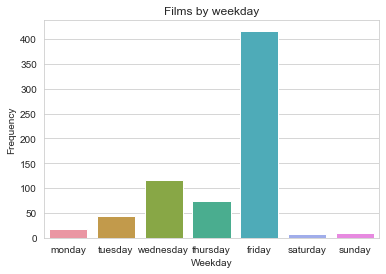

In [21]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.countplot(x='weekday', data=df, order=["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
plt.title('Films by weekday')
plt.xlabel("Weekday")
plt.ylabel("Frequency")

- Almost all films are relased on friday.
- Few films are released on weekends.

### 7. Column "followers"

In [22]:
df["followers"].describe()

count    6.840000e+02
mean     1.849252e+06
std      7.541705e+06
min      0.000000e+00
25%      4.074000e+03
50%      2.927550e+05
75%      9.599895e+05
max      1.280000e+08
Name: followers, dtype: float64

Text(20, 0.8, 'Mean = 1849251.97')

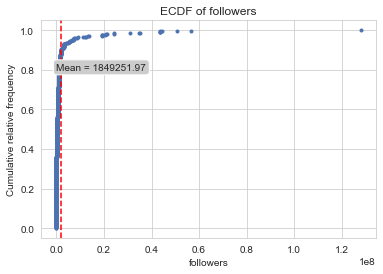

In [23]:
# ECDF
ecdf(df, 'followers')
plt.axvline(df['followers'].mean(), color='r', linestyle='dashed', linewidth=1.5)
plt.annotate((f"Mean = {round(df['followers'].mean(), 2)}"), 
             xy =(20, 0.8),
             xytext =(20, 0.8),
            bbox = dict(boxstyle ="round", fc ="0.8"))

- The mean is around 1850000 followers by movie
- 10% of the movies are above the mean
- We have extremely high values of ammount of followers in few specific movies (the mean is higher than the median)

### 8. Column "genres_1"

In [24]:
df["genres_1"].value_counts()

Documentary        187
Comedy             141
Drama              123
Action              38
Romance             34
Thriller            29
Horror              26
Crime               21
Animation           20
Music               17
Family              12
Science Fiction     10
Mystery              7
Fantasy              5
War                  4
Adventure            4
History              3
Western              2
Aftershow            1
Name: genres_1, dtype: int64

Text(0, 0.5, 'Frequency')

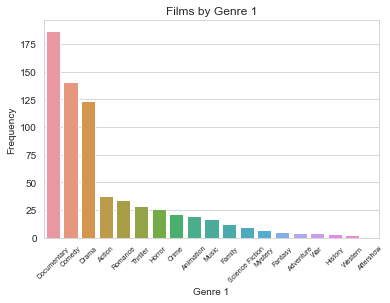

In [25]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.countplot(x='genres_1', data=df, order=[
    "Documentary",        
    "Comedy",     
    "Drama",              
    "Action",             
    "Romance",            
    "Thriller",           
    "Horror",             
    "Crime",              
    "Animation",          
    "Music",              
    "Family",             
    "Science Fiction",    
    "Mystery",            
    "Fantasy",            
    "Adventure",          
    "War",                
    "History",            
    "Western",            
    "Aftershow"          
])
plt.xticks(rotation=45, fontsize=7)
plt.title('Films by Genre 1')
plt.xlabel("Genre 1")
plt.ylabel("Frequency")

The three biggest categories are:
- Documentary
- Comedy
- Drama

### 9. Column "genres_2"

In [26]:
df["genres_2"].value_counts()

Drama              84
Comedy             51
Thriller           44
Romance            43
Crime              38
Music              37
Family             16
Action             15
Documentary        14
Mystery            14
Fantasy            12
Horror             10
History            10
Adventure           9
Interview           6
Science Fiction     6
Animation           5
TV Movie            3
War                 3
Western             3
Short               2
Dark comedy         1
Name: genres_2, dtype: int64

Text(0, 0.5, 'Frequency')

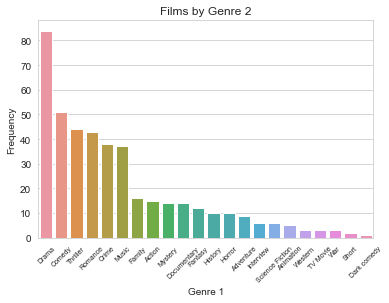

In [27]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.countplot(x='genres_2', data=df, order=[
    "Drama",              
    "Comedy",             
    "Thriller",           
    "Romance",            
    "Crime",              
    "Music",              
    "Family",             
    "Action",             
    "Mystery",            
    "Documentary",        
    "Fantasy",           
    "History",            
    "Horror",             
    "Adventure",          
    "Interview",          
    "Science Fiction",    
    "Animation",          
    "Western",            
    "TV Movie",           
    "War",                
    "Short",              
    "Dark comedy",        
])
plt.xticks(rotation=45, fontsize=7)
plt.title('Films by Genre 2')
plt.xlabel("Genre 1")
plt.ylabel("Frequency")

The three biggest categories are:
- Drama
- Comedy
- Thriller

### 10. Column "language"

In [28]:
df["original_language"].value_counts()

English                       454
Spanish                        40
Hindi                          36
French                         24
Portuguese                     17
Italian                        16
Indonesian                     12
German                         10
Korean                          8
Japanese                        8
Turkish                         7
Polish                          6
Dutch                           5
English/Spanish                 5
Thai                            3
Marathi                         3
Filipino                        3
Swedish                         3
Tamil                           2
English/Hindi                   2
English/Japanese                2
English/Mandarin                2
Spanish/Catalan                 1
English/Akan                    1
English/Russian                 1
Khmer/English/French            1
English/Arabic                  1
English/Taiwanese/Mandarin      1
English/Swedish                 1
Norwegian     

Most of the fils are in english

In [29]:
round(((len(df["original_language"])-454)/(len(df["original_language"])))*100, 2)

33.63

Just 33.63% of the movies aren't in english

([<matplotlib.patches.Wedge at 0x1658fc22ca0>,
 [Text(-0.5412260459052528, 0.9576399987645491, 'English language'),
  Text(0.5412259562445224, -0.9576400494377846, 'English not language or second language')])

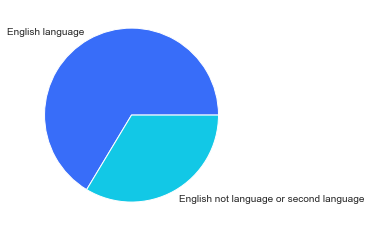

In [30]:
# Pie chart
sns.set_style("whitegrid")
sns.set_palette("rainbow")
data = [454, 230]
labels = ["English language", "English not language or second language"]
plt.pie(data, labels = labels)

### 11. Column "gender_difference"

In [31]:
# To analyse "gender difference" we exclude "gender_difference" nulls and "total_actors" null or 0
gender_df = df[df["gender_difference"].notnull()]
gender_df = gender_df[gender_df["total_actors"].notnull()]
gender_df = gender_df[gender_df["total_actors"] != 0]

In [32]:
gender_df["gender_difference"].describe()

count    617.000000
mean       3.341977
std        6.758694
min      -17.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       54.000000
Name: gender_difference, dtype: float64

In [33]:
gender_df["total_actors"].value_counts()

1      51
4      41
6      31
15     31
2      29
3      28
5      27
7      27
9      23
10     23
8      22
12     21
13     21
11     19
18     18
16     17
14     16
21     15
19     14
25     13
17     13
22     11
20     11
23      8
24      7
30      7
28      7
41      6
29      6
32      5
31      5
26      5
27      3
51      3
47      3
36      3
40      2
49      2
46      2
44      2
38      2
35      2
34      2
39      1
43      1
37      1
48      1
33      1
52      1
56      1
57      1
68      1
70      1
71      1
74      1
102     1
Name: total_actors, dtype: int64

In [34]:
# Movies with one actor by gender
gender_df[gender_df["total_actors"] == 1].groupby("genres_1").count()

,tmdb_id,imdb_id,title,original_title,release_date,year,month,year/month,weekday,original_language,...,director,male_actors,female_actors,total_actors,gender_difference,vote_count,vote_average,followers,imdb_score,score_rolling_average
genres_1,,,,,,,,,,,,,,,,,,,,,
Animation,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Comedy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Crime,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Documentary,36,36,36,36,36,36,36,36,36,36,...,35,36,36,36,36,36,36,36,36,34
Drama,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Music,5,5,5,5,5,5,5,5,5,5,...,4,5,5,5,5,5,5,5,5,5


A lot of movies with one actor are documentaries

In [35]:
one_actor_df = gender_df[gender_df["total_actors"] == 1]
one_actor_df["title"]

1      The Other One: The Long, Strange Trip of Bob Weir
6            Winter on Fire: Ukraine's Fight for Freedom
13                                       Team Foxcatcher
17                      Tony Robbins: I Am Not Your Guru
25                                        Audrie & Daisy
29                Justin Timberlake + The Tennessee Kids
31                  Sky Ladder: The Art of Cai Guo-Qiang
35                                        The Ivory Game
58                                           Rodney King
65                       Joshua: Teenager vs. Superpower
82                                         Strong Island
93                                             One of Us
99                                     Saving Capitalism
102                                               Voyeur
126                                 Ram Dass, Going Home
162                                          City of Joy
178                              Derren Brown: Sacrifice
179                            

In [36]:
# We delete this movies
gender_df = gender_df[gender_df["total_actors"] > 1]
gender_df.shape

(566, 27)

In [37]:
round((((gender_df["gender_difference"] > 0).sum())/566)*100, 2)

65.19

65.19% of Netflix movies has more man than woman

In [38]:
round((((gender_df["gender_difference"] == 0).sum())/566)*100, 2)

11.13

In [39]:
round((((gender_df["gender_difference"].dropna() < 0).sum())/617)*100, 2)

21.72

([<matplotlib.patches.Wedge at 0x1658fc7d100>,
 [Text(-0.5448025871372322, 0.9556098267852726, 'More actors'),
  Text(0.17688091456350805, -1.085685563164205, 'More actresses'),
  Text(1.030779120143332, -0.3840500038751962, 'Equal number')])

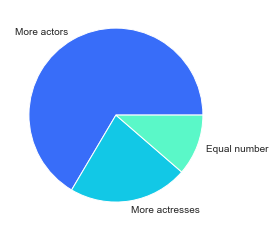

In [40]:
# Pie chart
sns.set_style("whitegrid")
sns.set_palette("rainbow")
data = [65.19, 21.72, 11.13]
labels = ["More actors", "More actresses", "Equal number"]
plt.pie(data, labels = labels)

## Bivariate analysis

### 1. "Genre" and "IMDB Score": which genres have the best rating scores?

In [41]:
print("The number of genres is: ", len(df["genres_1"].unique()))

The number of genres is:  19


Text(0, 0.5, 'Genre 1')

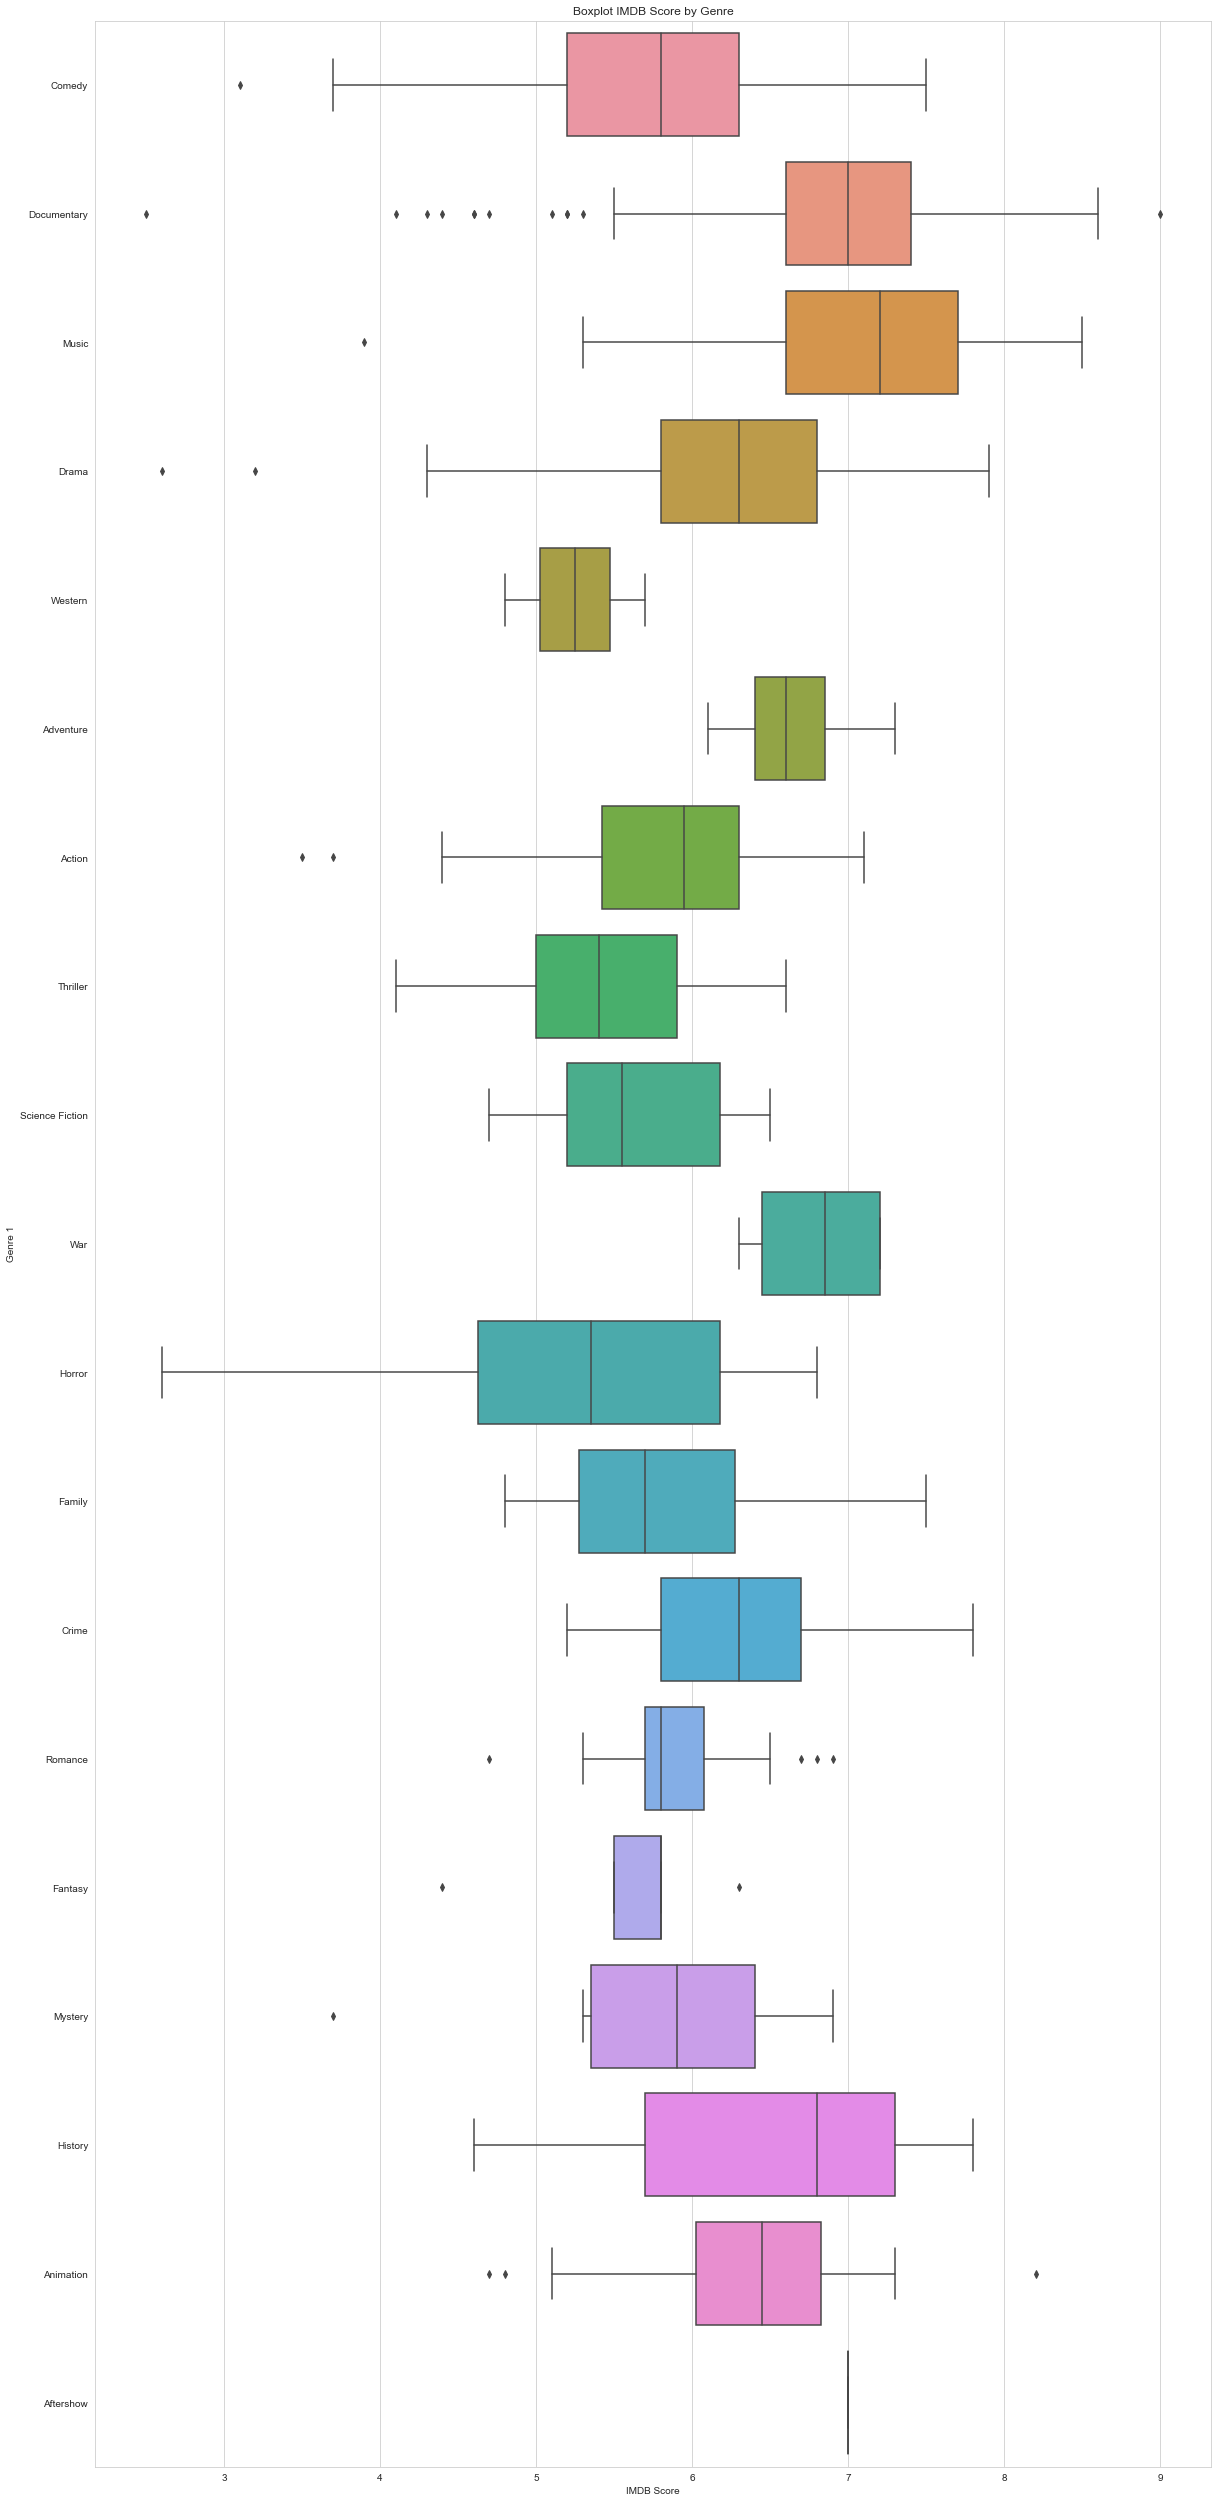

In [42]:
# The genres are very varied: we build a boxplot
sns.set_style("whitegrid")
sns.set_palette("rainbow")
plt.figure(figsize=(20, 45))
sns.boxplot(x='imdb_score', y='genres_1', data=df)
plt.title('Boxplot IMDB Score by Genre')
plt.xlabel("IMDB Score")
plt.ylabel("Genre 1")

- Movies with best performance are: Documentary, Music, War
- Movies with worst performance are: Thriller, Horror and Science Fiction
- Drama, History and Horror present a wide spread

In [43]:
# Mean by category: worst 10's
df.groupby('genres_1')['imdb_score'].mean().sort_values(ascending = False)

genres_1
Music              7.058824
Aftershow          7.000000
Documentary        6.902139
War                6.800000
Adventure          6.650000
History            6.400000
Animation          6.345000
Crime              6.285714
Drama              6.221138
Romance            5.897059
Family             5.850000
Action             5.786842
Comedy             5.758865
Mystery            5.714286
Science Fiction    5.620000
Fantasy            5.560000
Thriller           5.420690
Western            5.250000
Horror             5.238462
Name: imdb_score, dtype: float64

Text(0, 0.5, 'IMDB Score')

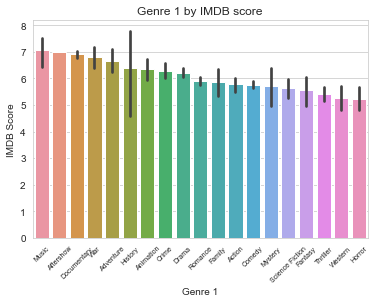

In [44]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.barplot(x='genres_1', y='imdb_score', data=df, order=[
    "Music",              
    "Aftershow",          
    "Documentary",        
    "War",                
    "Adventure",          
    "History",            
    "Animation",          
    "Crime",              
    "Drama",              
    "Romance",            
    "Family",             
    "Action",             
    "Comedy",             
    "Mystery",            
    "Science Fiction",    
    "Fantasy",            
    "Thriller",           
    "Western",            
    "Horror"                    
])
plt.xticks(rotation=45, fontsize=7)
plt.title('Genre 1 by IMDB score')
plt.xlabel("Genre 1")
plt.ylabel("IMDB Score")                

- Music and documentary have a good average but music has a relative big spread and documentary a relative small spread
- History has a big spread

### 2. "Language" y "IMDB Score"

In [45]:
df['original_language'].value_counts()

English                       454
Spanish                        40
Hindi                          36
French                         24
Portuguese                     17
Italian                        16
Indonesian                     12
German                         10
Korean                          8
Japanese                        8
Turkish                         7
Polish                          6
Dutch                           5
English/Spanish                 5
Thai                            3
Marathi                         3
Filipino                        3
Swedish                         3
Tamil                           2
English/Hindi                   2
English/Japanese                2
English/Mandarin                2
Spanish/Catalan                 1
English/Akan                    1
English/Russian                 1
Khmer/English/French            1
English/Arabic                  1
English/Taiwanese/Mandarin      1
English/Swedish                 1
Norwegian     

Text(0.5, 1.0, 'Language by IMDB Score')

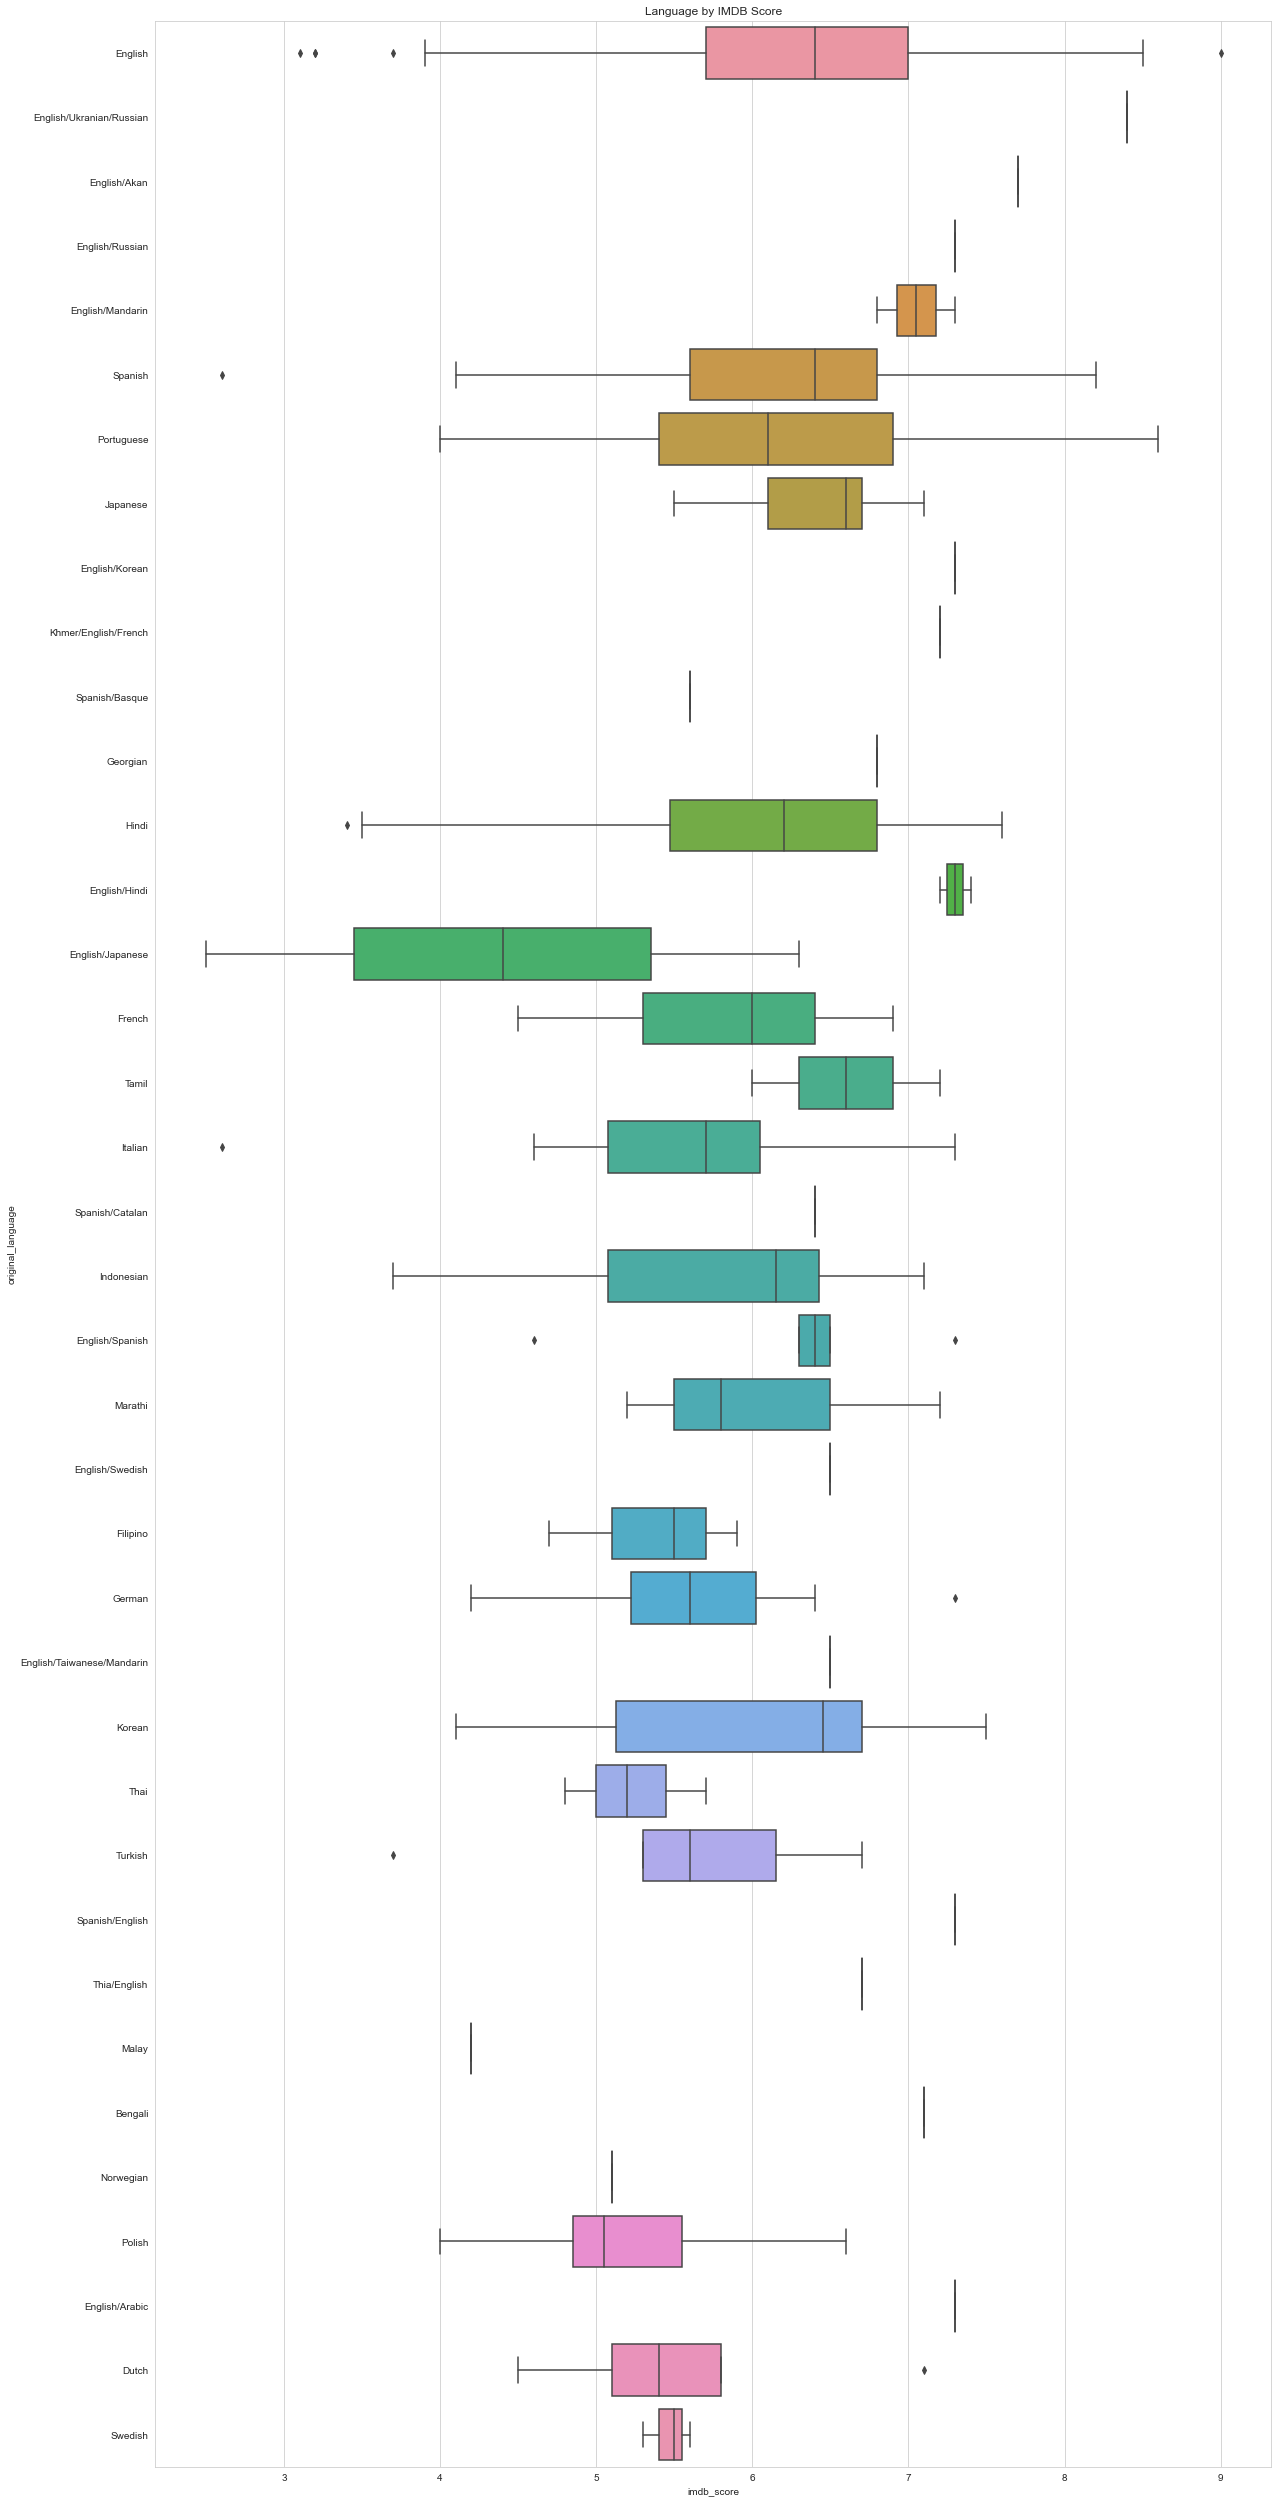

In [46]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(20, 45))
sns.boxplot(x='imdb_score', y='original_language', data=df)
plt.title('Language by IMDB Score')

In [47]:
# Worst 10
df.groupby('original_language')['imdb_score'].mean().sort_values(ascending=False)

original_language
English/Ukranian/Russian      8.400000
English/Akan                  7.700000
English/Hindi                 7.300000
English/Arabic                7.300000
English/Korean                7.300000
English/Russian               7.300000
Spanish/English               7.300000
Khmer/English/French          7.200000
Bengali                       7.100000
English/Mandarin              7.050000
Georgian                      6.800000
Thia/English                  6.700000
Tamil                         6.600000
English/Taiwanese/Mandarin    6.500000
English/Swedish               6.500000
Spanish/Catalan               6.400000
Japanese                      6.375000
English                       6.325551
English/Spanish               6.220000
Spanish                       6.180000
Portuguese                    6.123529
Marathi                       6.066667
Hindi                         6.011111
Korean                        5.950000
French                        5.804167
Indones

### 3. "Year" and "IMDB Score"

Text(0.5, 1.0, 'Barplot rating by year')

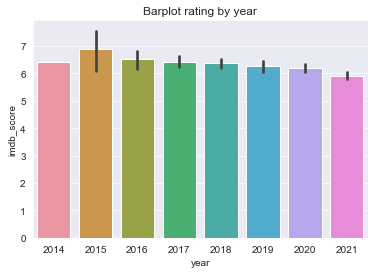

In [48]:
sns.set_style("darkgrid")
sns.set_palette("rainbow")
sns.barplot(x='year', y='imdb_score', data=df)
plt.title('Barplot rating by year')

We can observe again the slow downwards tendency of rating along time

Text(0, 0.5, 'IMDB Score')

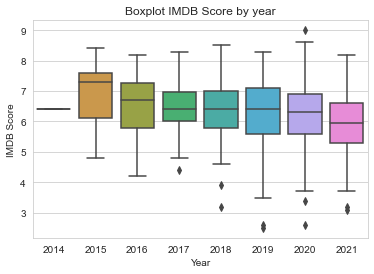

In [49]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.boxplot(x='year', y='imdb_score', data=df)
plt.title('Boxplot IMDB Score by year')
plt.xlabel("Year")
plt.ylabel("IMDB Score")                

### 4. "Month" and "IMDB Score"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'january'),
  Text(1, 0, 'february'),
  Text(2, 0, 'march'),
  Text(3, 0, 'april'),
  Text(4, 0, 'may'),
  Text(5, 0, 'june'),
  Text(6, 0, 'july'),
  Text(7, 0, 'august'),
  Text(8, 0, 'september'),
  Text(9, 0, 'october'),
  Text(10, 0, 'november'),
  Text(11, 0, 'december')])

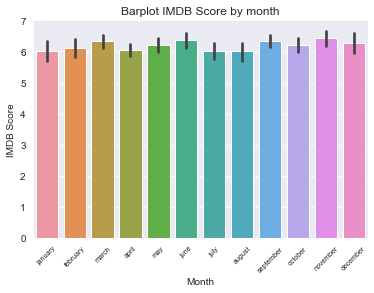

In [50]:
sns.set_style("darkgrid")
sns.set_palette("rainbow")
sns.barplot(x='month', y='imdb_score', data=df, order=[
    "january",
    "february",
    "march",
    "april",
    "may",
    "june",
    "july",
    "august",
    "september",
    "october",
    "november",
    "december"
])
plt.title('Barplot IMDB Score by month')
plt.xlabel("Month")
plt.ylabel("IMDB Score")
plt.xticks(rotation=45, fontsize=7)

- Movies released on september and november seems to have good average
- Movies released on april (a month with a lot of new content) seems to have a lower average

### 5. "Followers" and "IMDB Score"

C:\Users\Ospite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Followers')

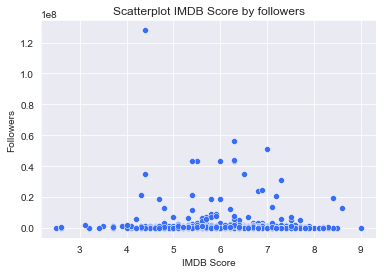

In [51]:
sns.scatterplot("imdb_score", "followers", data = df)
plt.title('Scatterplot IMDB Score by followers')
plt.xlabel("IMDB Score")
plt.ylabel("Followers")

- There is no relation between number of followers of the actors and rating
- Movies with a lot of Instagram followers tendd to be around the mean
- Just two movies with a lot of followers scored more than 8

C:\Users\Ospite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Followers')

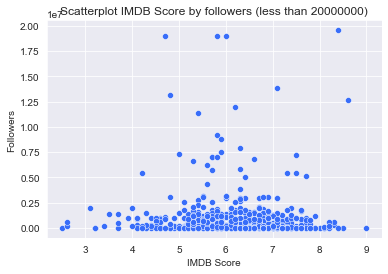

In [52]:
# We delete movies with more than 20000000 followers
df1 = df[df["followers"] < 20000000]
sns.scatterplot("imdb_score", "followers", data = df1)
plt.title('Scatterplot IMDB Score by followers (less than 20000000)')
plt.xlabel("IMDB Score")
plt.ylabel("Followers")

C:\Users\Ospite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Followers')

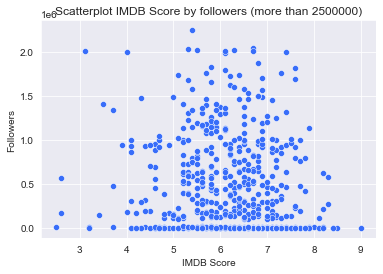

In [53]:
# We delete movies with less than 2500000 followers
df2 = df[df["followers"] < 2500000]
sns.scatterplot("imdb_score", "followers", data = df2)
plt.title('Scatterplot IMDB Score by followers (more than 2500000)')
plt.xlabel("IMDB Score")
plt.ylabel("Followers")

There is no relation between followers and rating at a general level

### 6. "Gender difference" and "IMDB Score"

C:\Users\Ospite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gender difference')

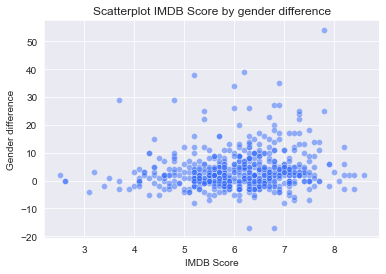

In [54]:
sns.scatterplot("imdb_score", "gender_difference", data = gender_df, alpha=0.5)
plt.title('Scatterplot IMDB Score by gender difference')
plt.xlabel("IMDB Score")
plt.ylabel("Gender difference")

C:\Users\Ospite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gender difference')

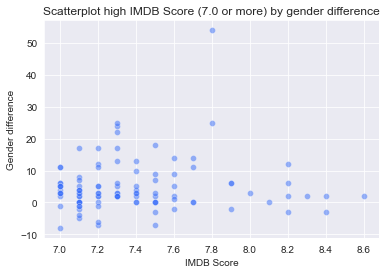

In [55]:
# Followers and IMDB score for high rated movies (more than 7.5)
df3 = gender_df[gender_df["imdb_score"] >= 7.0]
sns.scatterplot("imdb_score", "gender_difference", data = df3, alpha=0.5)
plt.title('Scatterplot high IMDB Score (7.0 or more) by gender difference')
plt.xlabel("IMDB Score")
plt.ylabel("Gender difference")

In [56]:
df3.shape

(104, 27)

In [57]:
round((((df3["gender_difference"] > 0).sum())/104)*100, 2)

72.12

In [58]:
round((((df3["gender_difference"] < 0).sum())/104)*100, 2)

15.38

In [59]:
round((((df3["gender_difference"] == 0).sum())/104)*100, 2)

12.5

([<matplotlib.patches.Wedge at 0x165921ac880>,
 [Text(-0.7043567715940271, 0.8449151071614471, 'More actors'),
  Text(0.3274059390783534, -1.0501453951983133, 'More actresses'),
  Text(1.0162676039994243, -0.4209514901520951, 'Equal number')])

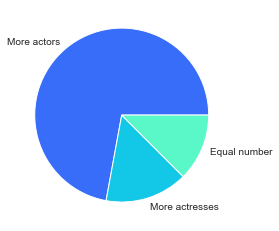

In [60]:
# Pie chart: gender difference in good rated movies (>7)
sns.set_style("whitegrid")
sns.set_palette("rainbow")
data = [72.12, 15.38, 12.5]
labels = ["More actors", "More actresses", "Equal number"]
plt.pie(data, labels = labels)

In [61]:
df.columns

Index(['tmdb_id', 'imdb_id', 'title', 'original_title', 'release_date', 'year',
       'month', 'year/month', 'weekday', 'original_language', 'runtime',
       'genres_1', 'genres_2', 'production_countries_1',
       'production_countries_2', 'overview', 'cast', 'director', 'male_actors',
       'female_actors', 'total_actors', 'gender_difference', 'vote_count',
       'vote_average', 'followers', 'imdb_score', 'score_rolling_average'],
      dtype='object')

### 7. "Gender difference" and "Genre"

In [62]:
# Male and female df's
male_df = gender_df[gender_df["gender_difference"] > 0]
female_df = gender_df[gender_df["gender_difference"] < 0]

In [63]:
# Male genres
male_df["genres_1"].value_counts()

Comedy             81
Drama              68
Documentary        67
Action             33
Thriller           21
Crime              19
Horror             17
Romance            13
Family             10
Science Fiction     9
Animation           8
Mystery             5
Music               4
Adventure           4
War                 3
Fantasy             3
Western             2
History             2
Name: genres_1, dtype: int64

In [64]:
# Female genres
female_df["genres_1"].value_counts()

Comedy         39
Drama          28
Documentary    21
Romance        15
Horror          6
Music           5
Action          4
Animation       4
Thriller        4
Mystery         2
Fantasy         2
Family          2
Crime           1
History         1
Name: genres_1, dtype: int64

In [65]:
# Male genres 2
male_df["genres_2"].value_counts()

Drama              55
Thriller           34
Comedy             30
Crime              24
Music              21
Romance            18
Action             13
Mystery             9
History             8
Horror              7
Fantasy             7
Adventure           6
Family              6
Science Fiction     5
Animation           4
Documentary         3
Interview           3
Western             2
War                 1
Name: genres_2, dtype: int64

In [66]:
# Female genres
female_df["genres_2"].value_counts()

Comedy         18
Drama          18
Romance        15
Music          10
Thriller        7
Family          6
Crime           4
Documentary     4
Fantasy         3
Adventure       2
Mystery         2
Horror          2
TV Movie        1
Western         1
Interview       1
Name: genres_2, dtype: int64

### 8. "Gender difference" and "followers"

C:\Users\Ospite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gender difference')

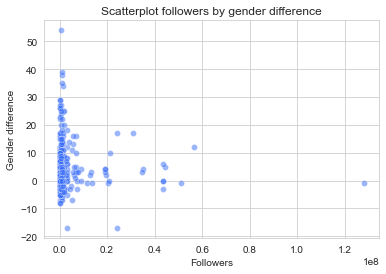

In [67]:
sns.scatterplot("followers", "gender_difference", data = gender_df, alpha=0.5)
plt.title('Scatterplot followers by gender difference')
plt.xlabel("Followers")
plt.ylabel("Gender difference")

C:\Users\Ospite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gender difference')

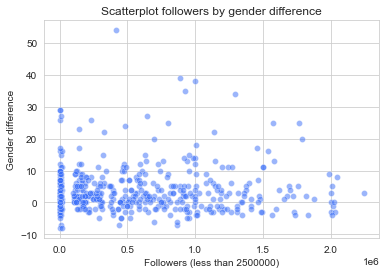

In [68]:
# Deleting outliers
gender_df1 = gender_df[gender_df["followers"] < 2500000]
sns.scatterplot("followers", "gender_difference", data = gender_df1, alpha=0.5)
plt.title('Scatterplot followers by gender difference')
plt.xlabel("Followers (less than 2500000)")
plt.ylabel("Gender difference")

There is no relation between gender difference and number of followers

### 9. "Followers" and "Genre 1"

In [80]:
genre_df = df.groupby("genres_1")["followers", "imdb_score"].mean()
round(genre_df, 2).sort_values(by="followers", ascending=False)

<ipython-input-80-7299c4d91030>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_df = df.groupby("genres_1")["followers", "imdb_score"].mean()


,followers,imdb_score
genres_1,,
Fantasy,11538549.40,5.56
Adventure,8061144.75,6.65
Music,6976445.94,7.06
Family,5472577.08,5.85
Romance,3404328.94,5.90
Western,2883708.50,5.25
Action,1838294.74,5.79
Thriller,1631063.41,5.42
Drama,1627230.97,6.22


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Music'),
  Text(3, 0, 'Family'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Western'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Thriller'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Comedy'),
  Text(10, 0, 'Documentary'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Science Fiction'),
  Text(13, 0, 'Crime'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'History'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Aftershow')])

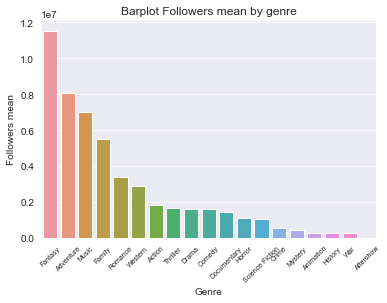

In [84]:
sns.set_style("darkgrid")
sns.set_palette("rainbow")
sns.barplot(x=genre_df.index, y='followers', data=genre_df, ci=None, order=[
    "Fantasy",
    "Adventure",
    "Music",
    "Family",
    "Romance",
    "Western",
    "Action",
    "Thriller",
    "Drama",
    "Comedy",
    "Documentary",
    "Horror",
    "Science Fiction",
    "Crime",
    "Mystery",
    "Animation",
    "History",
    "War",
    "Aftershow"
])
plt.title('Barplot Followers mean by genre')
plt.xlabel("Genre")
plt.ylabel("Followers mean")
plt.xticks(rotation=45, fontsize=7)

## By genre analysis

In [91]:
for genre in df["genres_1"].unique():
    x = df[df["genres_1"] == genre]
    print(genre)
    print(f"IMDB Score mean: {round(x['imdb_score'].mean(),2)}")
    print(f"IMDB Score median: {round(x['imdb_score'].median(),2)}")
    print()
    

Comedy
IMDB Score mean: 5.76
IMDB Score median: 5.8
Documentary
IMDB Score mean: 6.9
IMDB Score median: 7.0
Music
IMDB Score mean: 7.06
IMDB Score median: 7.2
Drama
IMDB Score mean: 6.22
IMDB Score median: 6.3
Western
IMDB Score mean: 5.25
IMDB Score median: 5.25
Adventure
IMDB Score mean: 6.65
IMDB Score median: 6.6
Action
IMDB Score mean: 5.79
IMDB Score median: 5.95
Thriller
IMDB Score mean: 5.42
IMDB Score median: 5.4
Science Fiction
IMDB Score mean: 5.62
IMDB Score median: 5.55
War
IMDB Score mean: 6.8
IMDB Score median: 6.85
Horror
IMDB Score mean: 5.24
IMDB Score median: 5.35
Family
IMDB Score mean: 5.85
IMDB Score median: 5.7
Crime
IMDB Score mean: 6.29
IMDB Score median: 6.3
Romance
IMDB Score mean: 5.9
IMDB Score median: 5.8
Fantasy
IMDB Score mean: 5.56
IMDB Score median: 5.8
Mystery
IMDB Score mean: 5.71
IMDB Score median: 5.9
History
IMDB Score mean: 6.4
IMDB Score median: 6.8
Animation
IMDB Score mean: 6.35
IMDB Score median: 6.45
Aftershow
IMDB Score mean: 7.0
IMDB Score

## By year analysis

## By language

## By IMDB Score quartiles analysis

In [88]:
df.columns

Index(['tmdb_id', 'imdb_id', 'title', 'original_title', 'release_date', 'year',
       'month', 'year/month', 'weekday', 'original_language', 'runtime',
       'genres_1', 'genres_2', 'production_countries_1',
       'production_countries_2', 'overview', 'cast', 'director', 'male_actors',
       'female_actors', 'total_actors', 'gender_difference', 'vote_count',
       'vote_average', 'followers', 'imdb_score', 'score_rolling_average'],
      dtype='object')